# Tutorial

### Instructions

In this tutorial, you will be creating a classifcation model. The data were collected from the Taiwan Economic Journal for the years 1999 to 2009. Company bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange. Apply what you have learnt and come up with the optimal model to predict if a company goes bankrupt or not. 

Bonus: Determine what are the key features that influence your model. 

 PS: If you find a technique/method that you believe was not shared in class but useful; you can and should use it. No points will be deducted for trying! Do not delete your trial scripts, these will be important for you to understand where you improved from your previous attempts.



In [71]:
## Given the model that you've generated, why did you choose a specific model to present to us? Is it because of the precision score, accuracy score, t-score, f1 score?

In [97]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

# Load the dataset
data = pd.read_csv('datasets/data.csv')

# Separate features (X) and target variable (y)
y = data['Bankrupt?']
X = data.drop(columns=['Bankrupt?'])

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


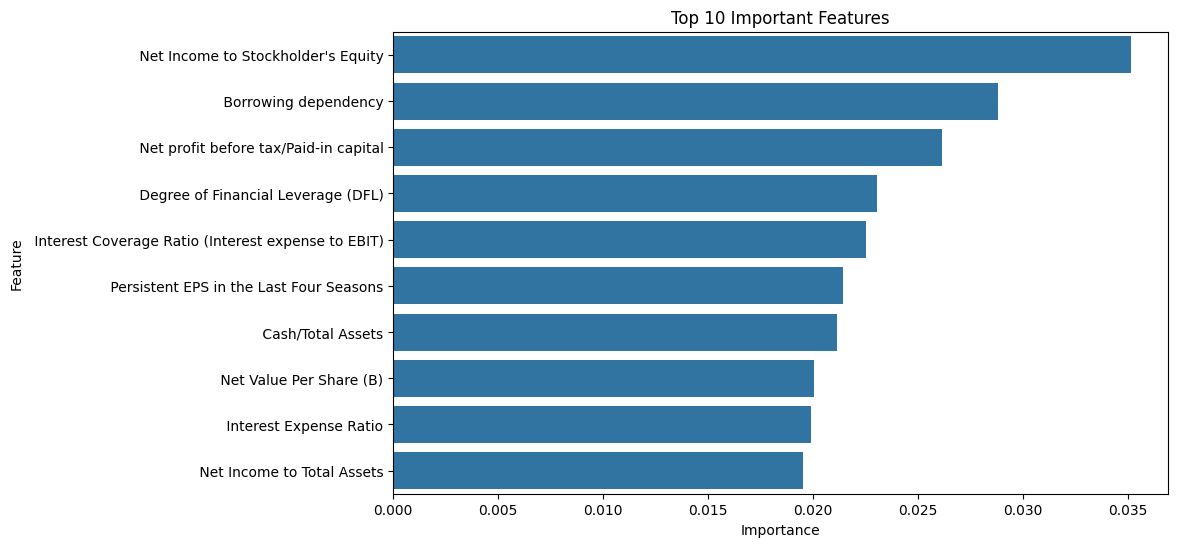

In [98]:
# Use a Random Forest classifier for feature selection
selector_model = RandomForestClassifier(random_state=42)
selector_model.fit(X_train, y_train)

# Determine feature importance
feature_importances = pd.DataFrame({
    'Feature': data.drop(columns=['Bankrupt?']).columns,
    'Importance': selector_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot the top 10 important features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10))
plt.title('Top 10 Important Features')
plt.show()

# Select only important features (cumulative importance > 95%)
cumulative_importance = feature_importances['Importance'].cumsum()
selected_features = feature_importances[cumulative_importance <= 0.95]['Feature'].values

# Reduce X_train and X_test to selected features
X_train_reduced = X_train[:, feature_importances['Feature'].isin(selected_features)]
X_test_reduced = X_test[:, feature_importances['Feature'].isin(selected_features)]


In [99]:

# Train Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train_reduced, y_train)

# Train Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_reduced, y_train)


GradientBoostingClassifier(random_state=42)

In [100]:
# Evaluate Logistic Regression
lr_predictions = lr_model.predict(X_test_reduced)
print("Logistic Regression Results:")
print(classification_report(y_test, lr_predictions))
print(confusion_matrix(y_test, lr_predictions))

# Evaluate Gradient Boosting
gb_predictions = gb_model.predict(X_test_reduced)
print("Gradient Boosting Results:")
print(classification_report(y_test, gb_predictions))
print(confusion_matrix(y_test, gb_predictions))


Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1968
           1       0.65      0.17      0.27        78

    accuracy                           0.96      2046
   macro avg       0.81      0.58      0.62      2046
weighted avg       0.96      0.96      0.95      2046

[[1961    7]
 [  65   13]]
Gradient Boosting Results:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1968
           1       0.45      0.23      0.31        78

    accuracy                           0.96      2046
   macro avg       0.71      0.61      0.64      2046
weighted avg       0.95      0.96      0.95      2046

[[1946   22]
 [  60   18]]


In [101]:
# List the top features influencing the model
key_features = feature_importances.head(10)
print("Key Features Influencing the Model:")
print(key_features)


Key Features Influencing the Model:
                                              Feature  Importance
89                 Net Income to Stockholder's Equity    0.035182
39                               Borrowing dependency    0.028828
42              Net profit before tax/Paid-in capital    0.026171
91                 Degree of Financial Leverage (DFL)    0.023080
92   Interest Coverage Ratio (Interest expense to ...    0.022546
18            Persistent EPS in the Last Four Seasons    0.021432
56                                  Cash/Total Assets    0.021148
15                            Net Value Per Share (B)    0.020054
34                             Interest Expense Ratio    0.019902
85                         Net Income to Total Assets    0.019537
